<a href="https://www.kaggle.com/code/pkappaka3/paddy-doctor-multimodel-v3-2?scriptVersionId=205312221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Check if the dataset is imbalanced ??

In [1]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [13]:
competition_name = "paddy-disease-classification"
interacting = TRUE

In [3]:
!pip install mlflow --quiet
!pip install pyngrok --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.


Read the MLFlow authentication tokens from colab secrets

In [8]:
import mlflow, os
from pyngrok import ngrok
if os.getenv("COLAB_RELEASE_TAG"):
    from google.colab import userdata
    os.environ['MLFLOW_TRACKING_USERNAME'] = userdata.get('MLFLOW_TRACKING_USERNAME')
    os.environ['MLFLOW_TRACKING_PASSWORD'] = userdata.get('MLFLOW_TRACKING_PASSWORD')
else:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    os.environ['MLFLOW_TRACKING_USERNAME'] = user_secrets.get_secret("MLFLOW_TRACKING_USERNAME")
    os.environ['MLFLOW_TRACKING_PASSWORD'] = user_secrets.get_secret("MLFLOW_TRACKING_USERNAME")
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = 'PADDYDOCTOR'

Start the MLFlow service in background on port 5000 for run logging in MLFlow

In [ ]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")# run tracking UI in the background

Using ngrok connect MLFLow local service URL to internet

In [ ]:
!ngrok config check

In [ ]:
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
if os.getenv("COLAB_RELEASE_TAG"):
    NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
else:
    NGROK_AUTH_TOKEN = user_secrets.get_secret("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Check if a tunnel is already running before starting a new one
active_tunnels = ngrok.get_tunnels()
active_tunnels
if not active_tunnels:
    # Open an HTTPs tunnel on port 5000 for http://localhost:5000
    public_url = ngrok.connect(5000, name='MLFLow URL')
    print("MLflow Tracking UI:", public_url)
else:
    print("An ngrok tunnel is already running:", active_tunnels[0].public_url)
    public_url = active_tunnels[0].public_url # Use the existing tunnel's URL

In [ ]:
# Cleanup function
def cleanup():
    # Close MLflow run if any is active
    try:
        mlflow.end_run()
    except:
        pass

    # Disconnect ngrok
    try:
        ngrok.disconnect(listener.url())
        ngrok.kill()  # Kill the ngrok process
    except:
        pass

    # Kill MLflow server (optional, if you want to completely shut down the server)
    !pkill -f "mlflow server"

Invoke cleanup at the end to stop MLFlow logging

In [ ]:
# Create a new experiment
try:
    experiment = mlflow.create_experiment('convnext_tiny')
except mlflow.exceptions.MlflowException as e:
    # If experiment already exists, get its ID
    experiment = mlflow.get_experiment_by_name('convnext_tiny').experiment_id

# Set the experiment
mlflow.set_experiment('convnext_tiny')

A trial parameter logging on MLFlow

In [9]:
import os
if os.getenv("COLAB_RELEASE_TAG"):
   print("Running in Colab")
else:
   print("NOT in Colab")

NOT in Colab


If notebook on colab, grant access to my google drive and access from notebook

In [10]:
# Mount your Google Drive.
import os
if os.getenv("COLAB_RELEASE_TAG"):
  file_path = "/content/drive"
  if not os.path.exists(file_path):
    from google.colab import drive
    drive.mount("/content/drive")

In [4]:
! pip install kaggle --quiet

If notebook on colab copy my kaggle token from my google drive to .kaggle directory to authenticate with kaggle for data dowload and notebook upload to kaggle.

In [ ]:
if os.getenv("COLAB_RELEASE_TAG"):
  file_path = "~/.kaggle/kaggle.json"
  if not os.path.exists(file_path):
    kaggle_creds_path = "/content/drive/MyDrive/kaggle.json"
    ! mkdir ~/.kaggle
    ! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
    ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip install fastkaggle --quiet
!pip install fastai --upgrade --quiet

^C
ERROR: Operation cancelled by user


In [6]:
from fastai.vision.all import *
from fastkaggle import *  # for easy Kaggle dataset access

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7d11ce9bb400>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


If notebook on colab download the dataset from kaggle if the dataset is not already present in my google drive.

In [ ]:
# Set up Kaggle credentials (you'll need to provide your kaggle.json file)
if os.getenv("COLAB_RELEASE_TAG"):
  save_data_drive_path='/content/drive/MyDrive/paddy-disease-classification'
  if not os.path.exists(save_data_drive_path):
    file_path = "/content/paddy-disease-classification.zip"
    if not os.path.exists(file_path):
      setup_comp('paddy-disease-classification', 'train.csv')
  else:
    print("Data already downloaded and saved in drive")

If notebook on colab download the dataset from kaggle if the dataset is not already present in my google drive and copy to my google drive.

In [ ]:
if os.getenv("COLAB_RELEASE_TAG"):
  import zipfile
  if not os.path.exists(save_data_drive_path):
    os.mkdir(save_data_drive_path)
  dir = os.listdir(save_data_drive_path)
  if len(dir) == 0:
    with zipfile.ZipFile('paddy-disease-classification.zip', 'r') as zip_ref:
      zip_ref.extractall(save_data_drive_path)

check if the notebook is running in GPU or CPU and use this variable to change the training methods according to the processor.

In [ ]:
# Check available device and set defaults
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
import fastai.torch_core
if device == 'cpu':
    fastai.torch_core.default_device(use=False)

In [ ]:
# import os
if device == 'cuda':
  os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
  os.environ['PYTORCH_CUDA_ALLOC_CONF']='expandable_segments'

If google colab notebook set the input paths accordingly, otherwise set the input paths according to kaggle paths.

In [7]:
# Set paths
if os.getenv("COLAB_RELEASE_TAG"):
  path = Path(save_data_drive_path)
  train_path = path/'train_images'
  test_path = path/'test_images'
elif iskaggle:
    path = Path('../input/paddy-disease-classification')
    train_path = path/'train_images'
    test_path = path/'test_images'
print(f"Train path: {train_path}")  # Print the train path
print(f"Test path: {test_path}")   # Print the test path

Train path: ../input/paddy-disease-classification/train_images
Test path: ../input/paddy-disease-classification/test_images


Instead of the get_image_files which will load all the images into the DataBlock for training created a custom function get_subset_items. Will use this loader function during the initial trial runs to quick perform training with a smaller dataset to verify the code and then switch back to get_image_files for the final run. Ensure that the subset is not too small, there is a risk some labels are not included and training will fail. Additional steps can be added within the get_subset_items to get a more equitable sampling of images.

In [15]:
if os.getenv("COLAB_RELEASE_TAG"):
  model_path='/content/drive/MyDrive/paddy-disease-classification/models'
  if not os.path.exists(model_path):
    os.mkdir(model_path)
import shutil

In [17]:
!ls ../

input  lib  working


In [8]:
df = pd.read_csv(path/'train.csv', index_col='image_id')
df.head()

,label,variety,age
image_id,,,
100330.jpg,bacterial_leaf_blight,ADT45,45
100365.jpg,bacterial_leaf_blight,ADT45,45
100382.jpg,bacterial_leaf_blight,ADT45,45
100632.jpg,bacterial_leaf_blight,ADT45,45
101918.jpg,bacterial_leaf_blight,ADT45,45


In [9]:
def get_variety(p): return df.loc[p.name, 'variety']

In [14]:
if interacting:
    dls = DataBlock(
        blocks=(ImageBlock,CategoryBlock,CategoryBlock),
        n_inp=1,
        get_items=get_image_files,
        get_y = [parent_label,get_variety],
        splitter=RandomSplitter(0.2, seed=42),
        item_tfms=Resize(192, method='squish'),
        batch_tfms=aug_transforms(size=128, min_scale=0.75)
    ).dataloaders(train_path)

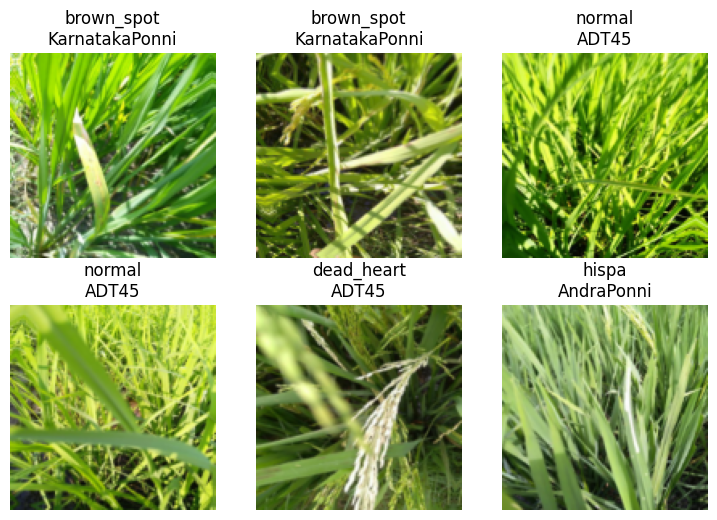

In [15]:
if interacting:
    dls.show_batch(max_n=6)

/tmp/ipykernel_30/1700526381.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(all_labels, ha='right')
/tmp/ipykernel_30/1700526381.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(all_labels, ha='right')



Distribution Difference Analysis:
--------------------------------------------------
Label           Train %    Val %      Diff %    
--------------------------------------------------
bacterial_leaf_blight      4.8%      3.7%      1.2%
bacterial_leaf_streak      3.6%      3.7%      0.1%
bacterial_panicle_blight      3.1%      3.8%      0.7%
blast               16.5%     17.3%      0.8%
brown_spot           9.3%      9.3%      0.0%
dead_heart          13.9%     13.6%      0.3%
downy_mildew         6.0%      5.7%      0.3%
hispa               15.2%     15.7%      0.5%
normal              16.9%     17.0%      0.0%
tungro              10.5%     10.1%      0.4%

KL Divergence: 0.0029


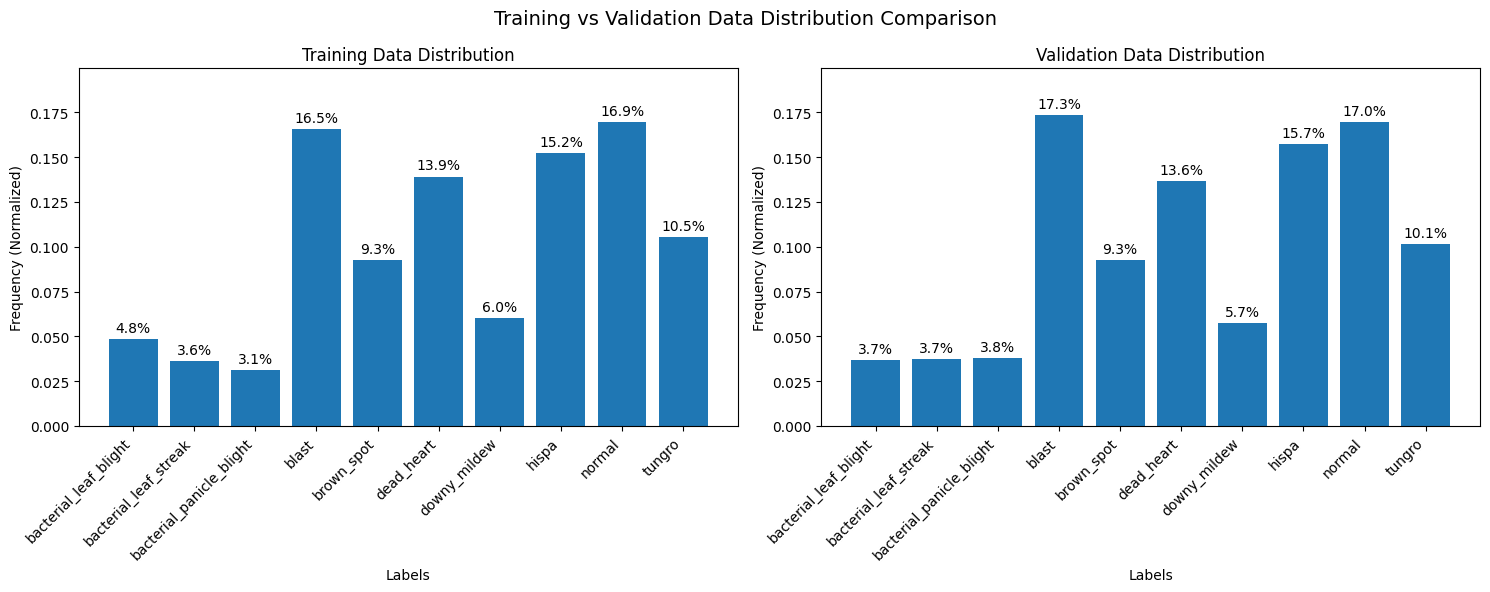

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fastai.vision.all import *

def compare_distributions(train_labels, val_labels):
    """
    Displays normalized histograms of training and validation labels side by side
    for easy distribution comparison.
    """
    # Create normalized distributions
    train_counts = pd.Series(train_labels).value_counts(normalize=True)
    val_counts = pd.Series(val_labels).value_counts(normalize=True)
    
    # Ensure both distributions have the same labels (categories)
    all_labels = sorted(list(set(train_counts.index) | set(val_counts.index)))
    train_counts = train_counts.reindex(all_labels, fill_value=0)
    val_counts = val_counts.reindex(all_labels, fill_value=0)
    
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Training vs Validation Data Distribution Comparison', fontsize=14)
    
    # Plot training distribution
    bars1 = ax1.bar(all_labels, train_counts.values)
    ax1.set_title('Training Data Distribution')
    ax1.set_xlabel('Labels')
    ax1.set_ylabel('Frequency (Normalized)')
    # Correct way to set tick rotation and alignment
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_xticklabels(all_labels, ha='right')
    
    # Plot validation distribution
    bars2 = ax2.bar(all_labels, val_counts.values)
    ax2.set_title('Validation Data Distribution')
    ax2.set_xlabel('Labels')
    ax2.set_ylabel('Frequency (Normalized)')
    # Correct way to set tick rotation and alignment
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_xticklabels(all_labels, ha='right')
    
    # Ensure both plots have the same y-axis scale
    max_freq = max(train_counts.max(), val_counts.max())
    ax1.set_ylim(0, max_freq * 1.15)  # Add 15% padding
    ax2.set_ylim(0, max_freq * 1.15)
    
    # Add percentage labels on bars
    def add_percentages(ax, bars):
        for bar in bars:
            percentage = '{:.1f}%'.format(100 * bar.get_height())
            ax.annotate(percentage,
                       xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center',
                       va='bottom')
    
    add_percentages(ax1, bars1)
    add_percentages(ax2, bars2)
    
    # Calculate distribution difference statistics
    print("\nDistribution Difference Analysis:")
    print("-" * 50)
    print(f"{'Label':<15} {'Train %':<10} {'Val %':<10} {'Diff %':<10}")
    print("-" * 50)
    for label in all_labels:
        train_pct = train_counts[label] * 100
        val_pct = val_counts[label] * 100
        diff = abs(train_pct - val_pct)
        print(f"{label:<15} {train_pct:>8.1f}% {val_pct:>8.1f}% {diff:>8.1f}%")
    
    # Calculate KL divergence
    epsilon = 1e-10  # Small constant to avoid log(0)
    kl_div = np.sum(train_counts * np.log((train_counts + epsilon) / (val_counts + epsilon)))
    print(f"\nKL Divergence: {kl_div:.4f}")
    
    plt.tight_layout()
    plt.show()

# Example usage with FastAI:

# Setup your FastAI DataLoaders

dls = ImageDataLoaders.from_folder(train_path, valid_pct=0.2)

# Get training and validation labels
train_labels = [os.path.basename(os.path.dirname(path)) for path in dls.train_ds.items] 
val_labels = [os.path.basename(os.path.dirname(path)) for path in dls.valid_ds.items]

# Compare distributions
compare_distributions(train_labels, val_labels)


In [17]:
# dls.train_ds.items[0]

Path('../input/paddy-disease-classification/train_images/tungro/107308.jpg')

In [15]:
# train_labels = dls.train_ds.y

AttributeError: y

In [20]:
# val_labels = [os.path.basename(os.path.dirname(path)) for path in dls.train_ds.items] 
# val_labels[0]

'tungro'

In [ ]:
def get_subset_items(path):
    """Selects 25 images per label from the dataset."""
    all_files = get_image_files(path)
    subset_files = []
    sample_size=250

    # Get unique labels from filenames (assuming labels are in the filenames)
    labels = set([f.parent.name for f in all_files])

    for label in labels:
        # Get all files with the current label
        label_files = [f for f in all_files if f.parent.name == label]

        # Shuffle and select 25 files for the current label
        subset_files.extend(L(label_files).shuffle()[:sample_size])

    print(f"Selected {len(subset_files)} images ( {sample_size} per label) out of {len(all_files)} total images.")
    return subset_files

item_tfms are applied inidividually on each image. batch_tfms are applied to the whole batch of images. These two data augmentation steps are passed to the DataBlock to apply on the data defined in the DataBlock.

My Google drive path to save the model

In [ ]:
# tta_res = []

Defined a training method,

*   Set the batch size with bs parameter
*   Use the DataBlock defined above for data loading
*   Use gradient accumulator after every 2 epochs ??



In [ ]:
def train(arch, desc, item, batch, epochs=10,accum=False):
    torch.cuda.empty_cache()
    kwargs = { 'bs': 16 } if accum else {}
    paddy_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,#get_subset_items,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=item,
    batch_tfms=batch
    )
    dls = paddy_block.dataloaders(train_path, **kwargs)
    cbs = GradientAccumulation(2) if accum else []
    learn = vision_learner(dls, arch, metrics=[error_rate,accuracy, top_k_accuracy, Precision(average='weighted'), Recall(average='weighted'), F1Score(average='weighted')]).to_fp16()
    learn.fine_tune(epochs, 0.01)
    lrn_rcd_vals = learn.recorder.values[-1]
    # tta_res.append(learn.tta(dl=dls.test_dl(test_path.ls())))
    learn.export(f'{arch}_{desc}.pkl')
    return learn, lrn_rcd_vals

Initiate training for the resnet26d archicture pretrained model

In [ ]:
# arch='resnet26d'
# learn = train('squish',arch,item=Resize(480,method='squish'),batch=aug_transforms(size=224,min_scale=0.75))
# learn.show_results()

Initiate the training for the convnext_tiny pretrained model architecture

In [ ]:
import torch
!unset PYTORCH_CUDA_ALLOC_CONF

# Explicitly delete the environment variable if present
if "PYTORCH_CUDA_ALLOC_CONF" in os.environ:
    del os.environ["PYTORCH_CUDA_ALLOC_CONF"]
    print("PYTORCH_CUDA_ALLOC_CONF deleted from environment.")


arch='convnext_small_in22k' #convnext_tiny'
v_image_size = (80,106)
#Enhanced data augmentation pipeline
# items = [
#     RandomResizedCrop(460, min_scale=0.75),  # Randomly crop and resize
#     FlipItem(p=0.5),  # Horizontal flip with 50% probability
# ]

# batchs = [
#     *aug_transforms(
#         size=v_image_size,
#         max_rotate=10.0,  # Rotation up to 10 degrees
#         max_zoom=1.1,     # Zoom in up to 10%
#         max_lighting=0.2, # Adjust brightness
#         max_warp=0.2,    # Perspective warping
#         p_affine=0.75,   # Probability of applying affine transforms
#         p_lighting=0.75,  # Probability of applying lighting transforms
#     ),
#     Normalize.from_stats(*imagenet_stats),
#     RandomErasing(p=0.5, max_count=2)  # Random erasing for occlusion robustness
# ]

# learn , lrn_rcd_vals = train(arch,desc='size80160',item=items,batch=batchs)

In [ ]:
desc='size80160'
learn , lrn_rcd_vals = train(arch, desc=desc,item=Resize((480, 360), method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),batch=aug_transforms(size=v_image_size, min_scale=0.75))

In [ ]:
if os.getenv("COLAB_RELEASE_TAG"):
    shutil.copy(f'{arch}_{desc}.pkl', f'{model_path}/{arch}_{desc}.pkl')

In [ ]:
# lrn_rcd_vals

In [ ]:
# for value in lrn_rcd_vals:
#     print(value)

In [ ]:
# Get and log metrics
train_loss = lrn_rcd_vals[0]
train_loss
valid_loss = lrn_rcd_vals[1]
error_rate_val = lrn_rcd_vals[2]
# Log parameters to MLflow
mlflow.log_param("architecture", arch)
# with mlflow.start_run(nested=True):
mlflow.log_param("batch_aug_size", v_image_size)
mlflow.log_param("batch_aug_min_scale", 0.75)
# with mlflow.start_run(nested=True):
mlflow.log_metric("train_loss", train_loss)
mlflow.log_metric("valid_loss", valid_loss)
mlflow.log_metric("error_rate", error_rate_val)

In [ ]:
learn.show_results()

In [ ]:
!unset PYTORCH_CUDA_ALLOC_CONF

# Explicitly delete the environment variable if present
if "PYTORCH_CUDA_ALLOC_CONF" in os.environ:
    del os.environ["PYTORCH_CUDA_ALLOC_CONF"]
    print("PYTORCH_CUDA_ALLOC_CONF deleted from environment.")
desc='size171_120'
learn , lrn_rcd_vals = train(arch,desc=desc, item=Resize((256,192), method=ResizeMethod.Pad, pad_mode=PadMode.Zeros), batch=aug_transforms(size=(171,128), min_scale=0.75))

In [ ]:
if os.getenv("COLAB_RELEASE_TAG"):
    shutil.copy(f'{arch}_{desc}.pkl', f'{model_path}/{arch}_{desc}.pkl')

In [ ]:
# Get and log metrics
train_loss = lrn_rcd_vals[0]
train_loss
valid_loss = lrn_rcd_vals[1]
error_rate_val = lrn_rcd_vals[2]
# Log parameters to MLflow
mlflow.log_param("architecture", arch)
# with mlflow.start_run(nested=True):
mlflow.log_param("batch_aug_size", v_image_size)
mlflow.log_param("batch_aug_min_scale", 0.75)
# with mlflow.start_run(nested=True):
mlflow.log_metric("train_loss", train_loss)
mlflow.log_metric("valid_loss", valid_loss)
mlflow.log_metric("error_rate", error_rate_val)

In [ ]:
learn.show_results()

In [ ]:
!unset PYTORCH_CUDA_ALLOC_CONF

# Explicitly delete the environment variable if present
if "PYTORCH_CUDA_ALLOC_CONF" in os.environ:
    del os.environ["PYTORCH_CUDA_ALLOC_CONF"]
    print("PYTORCH_CUDA_ALLOC_CONF deleted from environment.")
desc='size256_192'
learn , lrn_rcd_vals = train(arch, desc=desc, epochs=12, item=Resize((480, 360), method=ResizeMethod.Pad, pad_mode=PadMode.Zeros), batch=aug_transforms(size=(256,192), min_scale=0.75))

In [ ]:
if os.getenv("COLAB_RELEASE_TAG"):
    shutil.copy(f'{arch}_{desc}.pkl', f'{model_path}/{arch}_{desc}.pkl')

In [ ]:
# Get and log metrics
train_loss = lrn_rcd_vals[0]
train_loss
valid_loss = lrn_rcd_vals[1]
error_rate_val = lrn_rcd_vals[2]
# Log parameters to MLflow
mlflow.log_param("architecture", arch)
# with mlflow.start_run(nested=True):
mlflow.log_param("batch_aug_size", v_image_size)
mlflow.log_param("batch_aug_min_scale", 0.75)
# with mlflow.start_run(nested=True):
mlflow.log_metric("train_loss", train_loss)
mlflow.log_metric("valid_loss", valid_loss)
mlflow.log_metric("error_rate", error_rate_val)

In [ ]:
learn.show_results()

In [ ]:
tst_files = get_image_files(path/'test_images').sorted()
tst_dl = learn.dls.test_dl(tst_files)

In [ ]:
preds,_ = learn.tta(dl=tst_dl)

In [ ]:
idxs = preds.argmax(dim=1)

In [ ]:
vocab = np.array(learn.dls.vocab)
results = pd.Series(vocab[idxs], name="idxs")

In [ ]:
ss = pd.read_csv(path/'sample_submission.csv')
ss['label'] = results
ss.to_csv('subm.csv', index=False)
!head subm.csv

In [ ]:
# print(f"save_data_drive_path: {save_data_drive_path}")
if os.getenv("COLAB_RELEASE_TAG"):
    shutil.copy('subm.csv', f'{save_data_drive_path}/submission.csv')

In [ ]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('subm.csv', desc, competition_name)

In [ ]:
from kaggle import api
api.competition_submit_cli('subm.csv', desc, competition_name)

In [ ]:
if os.getenv("COLAB_RELEASE_TAG"):
    if not iskaggle:
        push_notebook('pkappaka3', 'paddydoctor_multimodel_v2.1',
        title='paddy_doctor_multimodel_v3',
        file='/content/drive/MyDrive/Colab Notebooks/paddydoctor_multimodel_04.ipynb' ,
        competition=competition_name, private=False, gpu=True)

In [ ]:
# Or call cleanup manually when you're done
cleanup()

In [4]:
!ls /

bin	       etc		    lib     media  root		   srv	var
boot	       home		    lib32   mnt    run		   sys
dev	       install_packages.sh  lib64   opt    run_jupyter.sh  tmp
entrypoint.sh  kaggle		    libx32  proc   sbin		   usr
